In [1]:
import pandas as pd 
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env
import acquire as acq
import prepare as prp
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

### PLANNING 

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### ACQUISITION

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Prep

In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# iris.rename(columns={'Sepal.Length':'sepal_length',
#                      '})

iris.columns = [col.lower().replace('.','_') for col in iris.columns]

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Explore

In [7]:
train_val, test = train_test_split(iris,
                                  train_size=0.8,
                                  random_state=1349,stratify=iris['species']
                                  )
train, validate = train_test_split(train_val,
                                  train_size=0.7,
                                  random_state=1249,stratify=train_val['species']
                                  )

In [8]:
train.shape, validate.shape,test.shape

((84, 5), (36, 5), (30, 5))

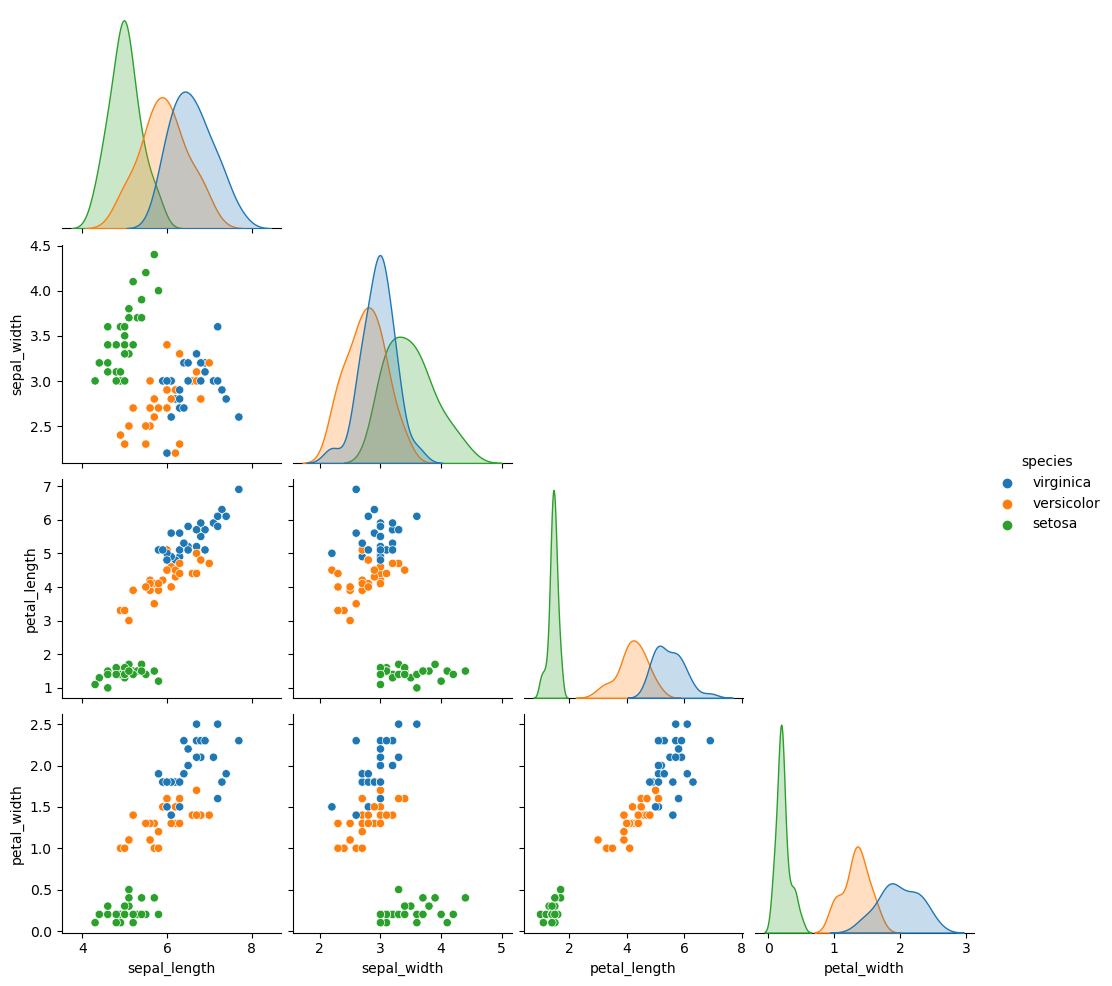

In [9]:
sns.pairplot(train,hue='species',corner=True)
plt.show()

In [10]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.215311,0.890129,0.860612
sepal_width,-0.215311,1.000000,-0.515401,-0.431912
petal_length,0.890129,-0.515401,1.000000,0.966377
petal_width,0.860612,-0.431912,0.966377,1.000000


### Modeling

In [11]:
X_cols = train.columns.to_list()
X_cols.remove('species')
y_cols = 'species'

In [12]:
X_cols
# y_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [13]:
train[y_cols] #.head()

103     virginica
86     versicolor
146     virginica
62     versicolor
76     versicolor
124     virginica
127     virginica
148     virginica
48         setosa
43         setosa
33         setosa
58     versicolor
49         setosa
108     virginica
119     virginica
98     versicolor
102     virginica
14         setosa
34         setosa
104     virginica
38         setosa
92     versicolor
70     versicolor
31         setosa
23         setosa
10         setosa
20         setosa
84     versicolor
99     versicolor
69     versicolor
134     virginica
145     virginica
15         setosa
54     versicolor
41         setosa
24         setosa
8          setosa
57     versicolor
78     versicolor
121     virginica
113     virginica
79     versicolor
4          setosa
112     virginica
116     virginica
2          setosa
144     virginica
83     versicolor
26         setosa
51     versicolor
6          setosa
50         setosa
60     versicolor
128     virginica
95     versicolor
5         

- Make the thing

- Fit the thing

- Use the thing

In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf

DecisionTreeClassifier()

In [16]:
clf.fit(train[X_cols],train[y_cols])

DecisionTreeClassifier()

In [17]:
clf.predict(train[X_cols]) # numpy array

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 've

In [18]:
model_1_preds = clf.predict(train[X_cols])

In [19]:
# lets make a second model with diff hyperparameters

clf1 = DecisionTreeClassifier(max_depth=2)
clf1.fit(train[X_cols],train[y_cols])
model_2_preds = clf1.predict(train[X_cols])

In [20]:
clf1.score(train[X_cols],train[y_cols])

0.9642857142857143

In [21]:
clf2 = DecisionTreeClassifier(max_depth=1)
clf2.fit(train[X_cols],train[y_cols])
model_3_preds = clf2.predict(train[X_cols])

In [22]:
clf2.score(train[X_cols],train[y_cols])

0.6666666666666666

In [23]:
train[X_cols].head()

,sepal_length,sepal_width,petal_length,petal_width
103,7.1,3.0,5.9,2.1
86,6.0,3.4,4.5,1.6
146,6.7,3.0,5.2,2.3
62,5.9,3.0,4.2,1.5
76,6.6,3.0,4.4,1.4


In [24]:
accuracy_score(train[y_cols],model_3_preds)

0.6666666666666666

In [25]:
clf2.score(train[X_cols],train[y_cols])

0.6666666666666666

In [26]:
print(export_text(clf,feature_names=X_cols))

|--- petal_width <= 0.75
|   |--- class: setosa
|--- petal_width >  0.75
|   |--- petal_length <= 4.75
|   |   |--- class: versicolor
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- sepal_width <= 2.65
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal_width >  2.65
|   |   |   |   |--- petal_length <= 5.05
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- petal_length >  5.05
|   |   |   |   |   |--- sepal_length <= 6.15
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- sepal_length >  6.15
|   |   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- class: virginica



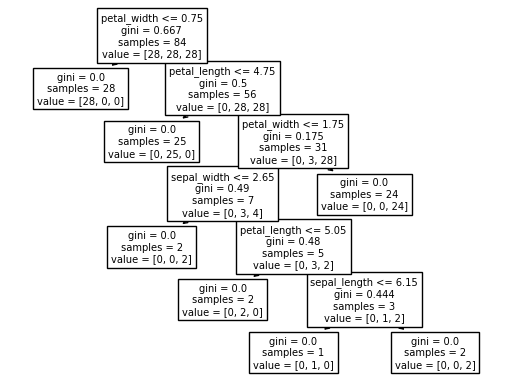

In [27]:

plot_tree(clf,feature_names=X_cols)
plt.show()

In [28]:
print(classification_report(train[y_cols],model_1_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      1.00      1.00        28
   virginica       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [29]:
print(classification_report(train[y_cols],model_2_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.89      0.94        28
   virginica       0.90      1.00      0.95        28

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
X_train = train[X_cols] 
y_train = train[y_cols]

In [32]:
# MAKE FIT USE...
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf1_preds = rf.predict(X_train)

In [33]:
# MAKE FIT USE...
rf = RandomForestClassifier()
rf.fit(X_train[['petal_length','petal_width']],y_train)
rf1_preds = rf.predict(X_train[['petal_length','petal_width']])

In [34]:
# validate back to clf for a sec...

X_val, y_val = validate[X_cols],validate[y_cols]

In [35]:
clf.score(X_val,y_val)

0.9722222222222222

In [36]:
clf.score(X_train,y_train)

1.0

In [37]:
clf1.score(X_val,y_val)

0.9444444444444444

In [38]:
clf1.score(X_train,y_train)

0.9642857142857143

In [39]:
clf2.score(X_val,y_val)

0.6666666666666666

In [40]:
clf2.score(X_train,y_train)

0.6666666666666666

In [41]:
rf.score(X_val[['petal_length','petal_width']],y_val)  # needs tthe 2 features that we specified earlier

0.9444444444444444

In [42]:
rf.score(X_train[['petal_length','petal_width']],y_train)

1.0

In [43]:
'''

train / val /test:
train:
.fit()
.predict()
val:
.predict()
.score()
test:
.score()/.predict() ... but only once after selecting the best model


'''

'\n\ntrain / val /test:\ntrain:\n.fit()\n.predict()\nval:\n.predict()\n.score()\ntest:\n.score()/.predict() ... but only once after selecting the best model\n\n\n'

In [44]:
val_pred = rf.predict(X_val[['petal_length','petal_width']])

In [45]:
pd.DataFrame(classification_report(y_val,val_pred,output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.916667,0.916667,0.944444,0.944444,0.944444
recall,1.0,0.916667,0.916667,0.944444,0.944444,0.944444
f1-score,1.0,0.916667,0.916667,0.944444,0.944444,0.944444
support,12.0,12.000000,12.000000,0.944444,36.000000,36.000000


- Decision Tree1 (model 2) had consistent train and validate accuracies
- others show evidence of overfit due to the drop-offf in values from train to valdate

In [46]:
clf1.score(test[X_cols],test[y_cols])

0.9333333333333333

In [47]:
import acquire
import env

In [48]:
acq.new_telco_data()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,3,1,3,2162-FRZAA,Male,0,Yes,Yes,63,No,...,Yes,No,No,No,39.35,2395.05,No,Two year,DSL,Bank transfer (automatic)
1,4,1,3,2160-GPFXD,Male,0,Yes,Yes,54,Yes,...,Yes,No,No,Yes,65.65,3566.7,No,Two year,DSL,Credit card (automatic)
2,2,1,2,2157-MXBJS,Male,0,Yes,No,13,Yes,...,No,Yes,Yes,Yes,75.30,989.45,Yes,One year,DSL,Mailed check
3,4,1,1,2155-AMQRX,Female,0,No,No,28,Yes,...,Yes,No,No,Yes,54.90,1505.15,No,Month-to-month,DSL,Credit card (automatic)
4,3,1,2,2150-WLKUW,Female,0,Yes,No,40,Yes,...,No,Yes,No,No,63.90,2635,No,One year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,8942-DBMHZ,Male,0,No,No,12,Yes,...,No internet service,No internet service,No internet service,No,20.45,255.35,No,Month-to-month,None,Mailed check
7039,2,3,3,8922-NPKBJ,Male,0,Yes,Yes,42,Yes,...,No internet service,No internet service,No internet service,No,19.35,867.3,No,Two year,None,Mailed check
7040,4,3,3,8917-SZTTJ,Male,0,Yes,Yes,60,Yes,...,No internet service,No internet service,No internet service,No,19.65,1161.75,No,Two year,None,Credit card (automatic)
7041,2,3,3,8917-FAEMR,Female,0,No,No,37,Yes,...,No internet service,No internet service,No internet service,No,19.85,784.25,No,Two year,None,Mailed check
